In [2]:
# Importing necessary libraries:
import torch
import torchvision
import torchvision.transforms as T
from torch import nn
from torchvision.datasets import STL10
from torch.utils.data.dataloader import DataLoader

In [3]:
# Device agnostic code:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"The current device torch is on: {device}")

The current device torch is on: cuda


In [4]:
transform = T.Compose([
    T.Resize(size=(224, 224)),
    T.ToTensor()
])

print(f"Transformation pipeline:\n{transform}")

Transformation pipeline:
Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [5]:
# Training and testing dataset
train_data = STL10(root = "dataset", split = "train", transform = transform, download = True)
test_data = STL10(root = "dataset", split = "test", transform = transform, download = True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
print(f"Length of training_data: {len(train_data)}")
print(f"Length of testing data: {len(test_data)}")

Length of training_data: 5000
Length of testing data: 8000


In [7]:
classes = train_data.classes
print(classes)

['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


(-0.5, 223.5, 223.5, -0.5)

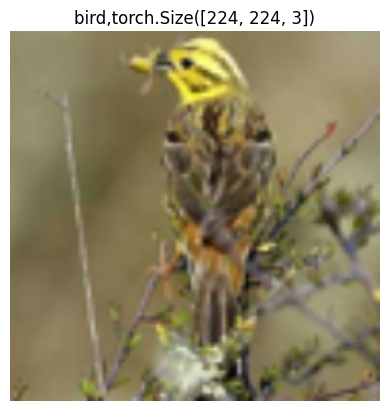

In [8]:
# Visualization:
import matplotlib.pyplot as plt

image = train_data[0][0].permute(1,2,0) # [channels, height, width] -> [height, width, channels]
label = train_data[0][1]

# Plot image
plt.figure()
plt.imshow(image)
plt.title(f"{classes[label]},{image.shape}")
plt.axis(False)

In [9]:
# Coverting train and test datasets into DataLoaders
BATCH_SIZE = 64
train_dataloader = DataLoader(dataset=train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset=test_data, batch_size = BATCH_SIZE, shuffle = False)

print(f"Length of train_dataloader:{len(list(next(iter(train_dataloader)))[0])}")
print(f"Length of test_dataloader:{len(list(next(iter(test_dataloader)))[0])}")

Length of train_dataloader:64
Length of test_dataloader:64


In [10]:
# Define your ResNet-50 model
class ResNet50(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50, self).__init__()
        # Define the architecture of ResNet-50
        # You can use torchvision.models to load a pre-defined ResNet-50
        # or implement it from scratch.
        self.resnet50 = torchvision.models.resnet50(pretrained=True)
        # Modify the final fully connected layer to match your number of classes
        self.resnet50.fc = nn.Linear(2048, num_classes)

    def forward(self, x):
        return self.resnet50(x)

In [11]:
model = ResNet50(num_classes = len(classes))
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet50(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [12]:
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [13]:
# model.to(device)
# epochs = 10
# for epoch in range(epochs):
#     model.train()  # Set the model to training mode
#     total_loss = 0
#     train_acc = 0
#     for batch_idx, (data, target) in enumerate(train_dataloader):
#         data, target = data.to(device), target.to(device)

#         y_logits = model(data)
#         y_preds = torch.argmax(torch.softmax(y_logits, dim = 1), dim = 1)
#         #print(y_preds.shape)
#         #print(y_logits.shape, target.shape)
#         loss = loss_fn(y_logits, target)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#         train_acc += (y_preds == target).sum().item() / len(target)

#         #y_pred_class = torch.argmax(torch.softmax(output, dim=1), dim=1)
#         #train_acc = (y_pred_class == target).sum().item() / len(output)

#         if (batch_idx + 1) % 10 == 0:
#             print(f'Epoch [{epoch + 1}/{epochs}], Batch [{batch_idx + 1}/{len(train_dataloader)}], Loss: {total_loss / (batch_idx + 1):.4f}, Acc: {train_acc / (batch_idx +1):.4f}')

#     print(f'Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(train_dataloader):.4f}, Acc: {train_acc / (len(train_dataloader)):.4f}')

In [14]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [15]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [16]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [17]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [18]:
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = model.to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9880 | train_acc: 0.6559 | test_loss: 1.7883 | test_acc: 0.5096
Epoch: 2 | train_loss: 0.6742 | train_acc: 0.7658 | test_loss: 1.1306 | test_acc: 0.6355
Epoch: 3 | train_loss: 0.5621 | train_acc: 0.8081 | test_loss: 0.9752 | test_acc: 0.6864
Epoch: 4 | train_loss: 0.4007 | train_acc: 0.8606 | test_loss: 1.3255 | test_acc: 0.6284
Epoch: 5 | train_loss: 0.3401 | train_acc: 0.8875 | test_loss: 1.6405 | test_acc: 0.6309
Epoch: 6 | train_loss: 0.2569 | train_acc: 0.9112 | test_loss: 0.6758 | test_acc: 0.7823
Epoch: 7 | train_loss: 0.2047 | train_acc: 0.9304 | test_loss: 0.8586 | test_acc: 0.7628
Epoch: 8 | train_loss: 0.2509 | train_acc: 0.9185 | test_loss: 0.7509 | test_acc: 0.7715
Epoch: 9 | train_loss: 0.2352 | train_acc: 0.9201 | test_loss: 0.9894 | test_acc: 0.7125
Epoch: 10 | train_loss: 0.1892 | train_acc: 0.9341 | test_loss: 0.8024 | test_acc: 0.7718
Total training time: 901.737 seconds


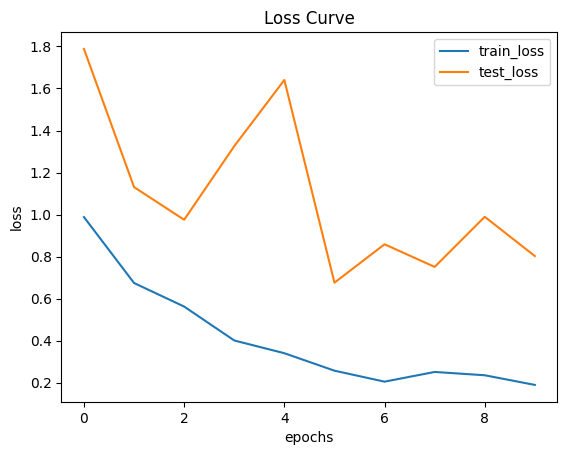

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_0_results["train_loss"], label = "train_loss")
plt.plot(model_0_results["test_loss"], label = "test_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Curve")
plt.legend()

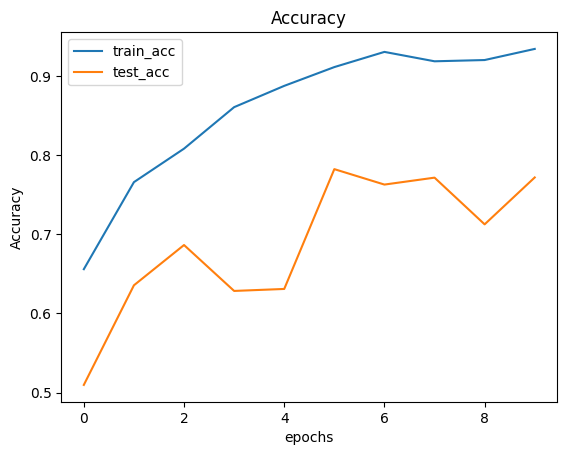

In [20]:
plt.figure()
plt.plot(model_0_results["train_acc"], label = "train_acc")
plt.plot(model_0_results["test_acc"], label = "test_acc")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

In [21]:
# img, label = test_data[0][0], test_data[0][1]
# # torch.unsqueeze(dim = )
# img.unsqueeze(dim=0), img.unsqueeze(dim=0).shape, classes[label]

In [22]:
# # Inferencing on test_dataset:
# model.eval()
# with torch.inference_mode():
#   single_pred = model(img.unsqueeze(dim=0).to(device))

# print(f"Prediction: {classes[single_pred.argmax(dim=1)]}")

In [23]:
# Checking multiple predicitons
test_batch_labels = next(iter(test_dataloader))[1]
test_batch_images = next(iter(test_dataloader))[0]
model.cpu()
predictions = model(test_batch_images)
print(predictions.argmax(dim=1) == test_batch_labels)

tensor([ True, False, False,  True,  True,  True,  True,  True,  True, False,
         True,  True, False,  True,  True, False,  True, False,  True,  True,
        False,  True,  True,  True,  True,  True, False,  True,  True, False,
         True,  True,  True,  True,  True,  True, False,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True, False,  True, False, False,  True,  True, False,
         True,  True,  True,  True])


In [24]:
for pred in predictions:
  print(classes[pred.argmax(dim=0)][:10])

horse
bird
airplane
airplane
cat
bird
bird
bird
deer
dog
airplane
airplane
cat
airplane
bird
cat
deer
car
airplane
horse
horse
cat
bird
cat
car
horse
bird
dog
car
cat
bird
horse
cat
monkey
truck
car
cat
monkey
truck
bird
bird
truck
airplane
horse
deer
truck
bird
bird
cat
car
bird
deer
airplane
bird
truck
airplane
car
monkey
car
ship
airplane
bird
bird
monkey


In [25]:
# # Saving the model
# model_name = "ResNet50STL10.pth"
# torch.save(model, model_name)

In [26]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix = confusion_matrix(y_true = test_batch_labels.cpu().detach().numpy(), y_pred = predictions.argmax(dim=1).cpu().detach().numpy())
# confusion_matrix

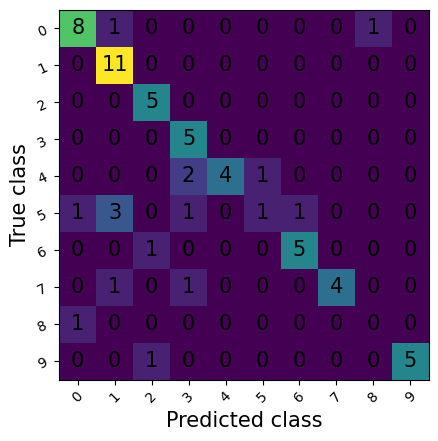

In [27]:
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchmetrics.classification import ConfusionMatrix
mcf = ConfusionMatrix(task = "multiclass", num_classes = 10)
mcf(predictions.argmax(dim=1).cpu(), test_batch_labels.cpu())
fig_, ax_ = mcf.plot()